The dataset was downloaded from the 'Inside Airbnb' website, from the city of Melbourne, in Victoria, Australia, and contains information about Airbnb listings.


# Libraries

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Uploading and understanding the dataset

In [193]:
df = pd.read_csv('/content/listings.csv', engine='python', on_bad_lines='skip')

In [194]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10803,https://www.airbnb.com/rooms/10803,20230606220121,2023-06-07,city scrape,Rental unit in Brunswick East · ★4.49 · 1 bedr...,A large air conditioned room with firm queen s...,This hip area is a crossroads between two grea...,https://a0.muscache.com/pictures/e5f30dd1-ac57...,38901,...,4.69,4.65,4.60,NaN,f,1,0,1,0,1.35
1,12936,https://www.airbnb.com/rooms/12936,20230606220121,2023-06-07,previous scrape,Rental unit in St Kilda · ★4.68 · 1 bedroom · ...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,https://a0.muscache.com/pictures/59701/2e8cdaf...,50121,...,4.83,4.78,4.66,NaN,f,10,10,0,0,0.27
2,41836,https://www.airbnb.com/rooms/41836,20230606220121,2023-06-07,previous scrape,Home in Reservoir · ★4.71 · 1 bedroom · 1 bed ...,Easy to travel from and to the Airport; quiet ...,"The neighbours are quiet and friendly, please...",https://a0.muscache.com/pictures/569696dd-1ad0...,182833,...,4.83,4.39,4.69,NaN,f,2,0,2,0,1.04
3,43429,https://www.airbnb.com/rooms/43429,20230606220121,2023-06-07,city scrape,Rental unit in Oakleigh East · ★4.87 · 1 bedro...,SPECIAL NOTICE - We are excited to announce bu...,Oakleigh is one of the most convenient and div...,https://a0.muscache.com/pictures/8c6284de-36de...,189684,...,4.93,4.79,4.86,NaN,f,3,3,0,0,1.61
4,38271,https://www.airbnb.com/rooms/38271,20230606220121,2023-06-07,city scrape,Rental unit in Berwick · ★4.86 · 3 bedrooms · ...,After hosting many guests from all over the wo...,Our street is quiet & secluded but within walk...,https://a0.muscache.com/pictures/1182791/3bf4b...,164193,...,4.93,4.90,4.87,NaN,f,1,1,0,0,1.44


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22253 entries, 0 to 22252
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22253 non-null  int64  
 1   listing_url                                   22253 non-null  object 
 2   scrape_id                                     22253 non-null  int64  
 3   last_scraped                                  22253 non-null  object 
 4   source                                        22253 non-null  object 
 5   name                                          22253 non-null  object 
 6   description                                   21893 non-null  object 
 7   neighborhood_overview                         12810 non-null  object 
 8   picture_url                                   22253 non-null  object 
 9   host_id                                       22253 non-null 

In [196]:
df.last_scraped.value_counts()

2023-06-07    22253
Name: last_scraped, dtype: int64

In [197]:
df.amenities[0]

'["Cooking basics", "Security cameras on property", "Bathtub", "Wifi \\u2013 24 Mbps", "Radiant heating", "Luggage dropoff allowed", "Dishes and silverware", "Kitchen", "Freezer", "Body soap", "Carbon monoxide alarm", "Shampoo", "Drying rack for clothing", "Microwave", "Hot water", "Chef oven", "Outdoor dining area", "Clothing storage: wardrobe", "Bed linens", "Stove", "Hangers", "Iron", "Portable fans", "Room-darkening shades", "Wine glasses", "Books and reading material", "Free washer \\u2013 In unit", "27\\" HDTV with Netflix", "Toaster", "Hair dryer", "Smoke alarm", "Blender", "Self check-in", "Conditioner", "Barbecue utensils", "First aid kit", "Dedicated workspace", "Portable air conditioning", "Ethernet connection", "Dining table", "Shower gel", "Lock on bedroom door", "Bikes", "Shared backyard \\u2013 Fully fenced", "Laundromat nearby", "Pets allowed", "Extra pillows and blankets", "Keypad", "Baking sheet", "Fire extinguisher", "Cleaning products", "Refrigerator", "Hot water ke

In [198]:
unique_columns = ['id', 'listing_url', 'scrape_id', 'name', 'description', 'neighborhood_overview', 'picture_url']

for col in unique_columns:
  print(df[col].shape, df[col].nunique())

(22253,) 22253
(22253,) 22253
(22253,) 1
(22253,) 16204
(22253,) 20503
(22253,) 10796
(22253,) 21726



The dataset contains 22.253 entries of Airbnb listings scraped from the Airbnb website in june, 2023. There are 75 features.

1.   4 features contain only nulls (neighbourhood_group_cleansed, bathrooms, calendar_updated and license)
2.   Some features are supposed to be composed by unique values, so they won't be providing relevant information for this analysis (id, listing_url, scrape_id, name, description, neighborhood_overview, picture_url)
3. There are 22 features about the host
4. There are 3 features about the neighbourhood and features for latitude and longitude
5. There are 15 features with information from the calendar, which shows future bookings (so there is no information from the past)
6. There are 13 features about reviews
7. The 'amenities' feature has objects that contain a list of all the amenities a listing has.



# Creating a dataframe for a first analysis

In [199]:
df.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
   

In [200]:
columns_to_keep = [
       'neighbourhood_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'number_of_reviews_ltm', 'review_scores_rating']

df_sum = df[columns_to_keep]

df_sum.columns = [col.strip() for col in df_sum.columns]
df_sum

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,number_of_reviews_ltm,review_scores_rating
0,Moreland,Private room in rental unit,Private room,2,1 shared bath,NaN,1.0,$44.00,7,25,4.49
1,Port Phillip,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,$95.00,3,0,4.68
2,Darebin,Private room in home,Private room,2,1 shared bath,NaN,1.0,$40.00,7,0,4.71
3,Monash,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,$118.00,2,20,4.87
4,Casey,Entire rental unit,Entire home/apt,5,1 bath,3.0,3.0,$117.00,1,35,4.86
...,...,...,...,...,...,...,...,...,...,...,...
22248,Glen Eira,Entire rental unit,Entire home/apt,4,1 bath,2.0,3.0,$182.00,3,0,NaN
22249,Moonee Valley,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,$70.00,3,0,NaN
22250,Melbourne,Entire townhouse,Entire home/apt,4,1 bath,3.0,3.0,$451.00,4,0,NaN
22251,Melbourne,Entire rental unit,Entire home/apt,4,2 baths,2.0,2.0,$174.00,1,0,NaN


In [201]:
df_sum = df_sum.assign(price = lambda x: x.price.apply(lambda value: float(value.replace("$", "").replace(",", ""))))

In [202]:
df_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22253 entries, 0 to 22252
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  22253 non-null  object 
 1   property_type           22253 non-null  object 
 2   room_type               22253 non-null  object 
 3   accommodates            22253 non-null  int64  
 4   bathrooms_text          22240 non-null  object 
 5   bedrooms                16185 non-null  float64
 6   beds                    22054 non-null  float64
 7   price                   22253 non-null  float64
 8   minimum_nights          22253 non-null  int64  
 9   number_of_reviews_ltm   22253 non-null  int64  
 10  review_scores_rating    17909 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1.9+ MB


# Inspecting and cleaning

## Nulls

In [203]:
# Checking percentage of nulls in each column

((df_sum.isnull().sum() / df_sum.shape[0]) * 100).round(2)

neighbourhood_cleansed     0.00
property_type              0.00
room_type                  0.00
accommodates               0.00
bathrooms_text             0.06
bedrooms                  27.27
beds                       0.89
price                      0.00
minimum_nights             0.00
number_of_reviews_ltm      0.00
review_scores_rating      19.52
dtype: float64

<Axes: >

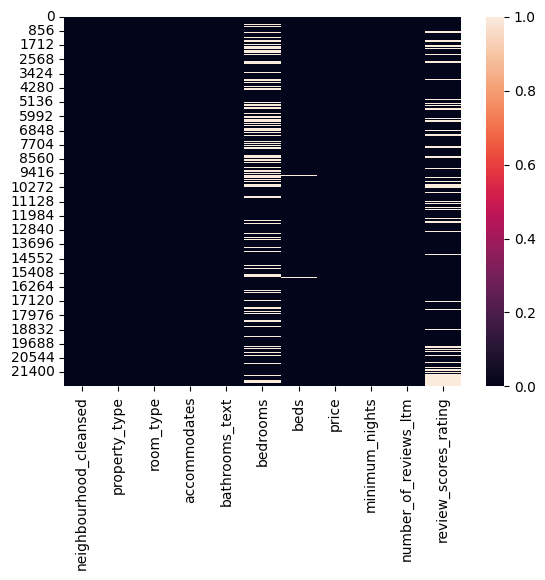

In [204]:
# Checking null 'zones'

sns.heatmap(df_sum.isnull())

In [205]:
df_bedrooms_check = df_sum[df_sum.bedrooms.isna()]
df_bedrooms_check.shape

(6068, 11)

In [206]:
df_bedrooms_check.room_type.value_counts()

Private room       5238
Entire home/apt     556
Shared room         266
Hotel room            8
Name: room_type, dtype: int64

In [207]:
(5238 + 266 + 8) / 6068

0.9083717864205669

In [208]:
# Checking entries where the room type is 'entire home/apt' for null values in bedrooms

df_bedrooms_check.loc[df_bedrooms_check['room_type'] == 'Entire home/apt']

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,number_of_reviews_ltm,review_scores_rating
140,Port Phillip,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,99.0,1,0,4.86
210,Melbourne,Entire loft,Entire home/apt,2,1 bath,NaN,1.0,173.0,2,42,4.87
215,Melbourne,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,117.0,1,18,4.61
274,Melbourne,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,159.0,5,13,4.35
277,Port Phillip,Entire guest suite,Entire home/apt,4,1 bath,NaN,1.0,145.0,2,0,5.00
...,...,...,...,...,...,...,...,...,...,...,...
21698,Moreland,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,101.0,2,0,NaN
21946,Melbourne,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,229.0,6,0,NaN
21957,Port Phillip,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,98.0,3,0,NaN
22192,Melbourne,Entire rental unit,Entire home/apt,2,1 bath,NaN,NaN,153.0,2,0,NaN


91% of the missing values for
 'bedroom' are missing because the 'room type' is either a private room, a shared room or a hotel room. <br>
In 9% of the cases it's an entire home/apt and therefore could be considered a real null.

In [209]:
((df_sum.isnull().sum() / df_sum.shape[0]) * 100).round(2)

neighbourhood_cleansed     0.00
property_type              0.00
room_type                  0.00
accommodates               0.00
bathrooms_text             0.06
bedrooms                  27.27
beds                       0.89
price                      0.00
minimum_nights             0.00
number_of_reviews_ltm      0.00
review_scores_rating      19.52
dtype: float64

In [210]:
# Replacing null values in 'bedrooms' where room type is 'entire home/apt'

df_sum.loc[df_sum['room_type'] == 'Entire home/apt', 'bedrooms'] = df_sum.loc[df_sum['room_type'] == 'Entire home/apt', 'bedrooms'].fillna(0)

In [211]:
# Dropping entries with null values for 'bathrooms_text' and 'beds'

df_sum = df_sum.dropna(subset=['bathrooms_text', 'beds'], how='any')

In [212]:
# Replacing null values in 'bedrooms' and 'review_scores_rating' with KNN Imputer

knn = KNNImputer()
df_sum['bedrooms'] = knn.fit_transform(df_sum['bedrooms'].values.reshape(-1, 1))
df_sum['review_scores_rating'] = knn.fit_transform(df_sum['review_scores_rating'].values.reshape(-1, 1))

In [213]:
df_sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22044 entries, 0 to 22252
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  22044 non-null  object 
 1   property_type           22044 non-null  object 
 2   room_type               22044 non-null  object 
 3   accommodates            22044 non-null  int64  
 4   bathrooms_text          22044 non-null  object 
 5   bedrooms                22044 non-null  float64
 6   beds                    22044 non-null  float64
 7   price                   22044 non-null  float64
 8   minimum_nights          22044 non-null  int64  
 9   number_of_reviews_ltm   22044 non-null  int64  
 10  review_scores_rating    22044 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 2.0+ MB


## Outliers

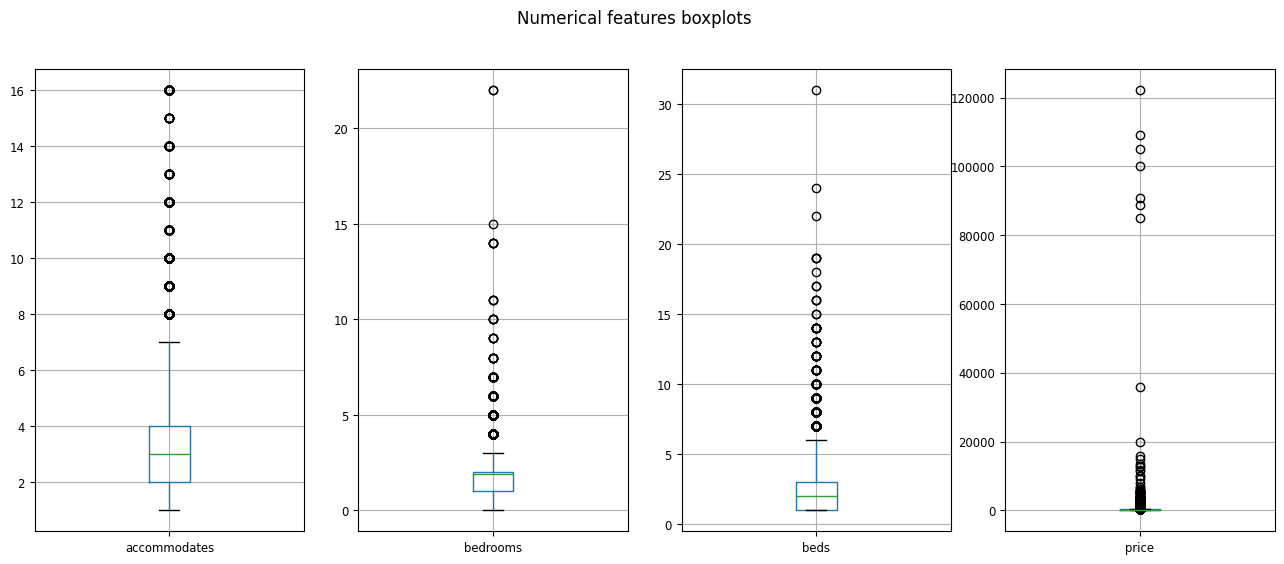

In [214]:
# Checking the boxplot for each numerical feature

files = [df_sum[c] for c in df_sum._get_numeric_data().columns]
_, axarr = plt.subplots(1,4,figsize=(16,6), squeeze=True)
_.suptitle('Numerical features boxplots')
for data, ax in zip(files, axarr.flat):
  pd.DataFrame(data).boxplot(ax=ax, fontsize='small')

In [215]:
df_sum.describe().round(2)

,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews_ltm,review_scores_rating
count,22044.00,22044.00,22044.00,22044.00,22044.00,22044.00,22044.00
mean,3.65,1.91,2.11,253.32,5.18,9.95,4.64
std,2.34,0.99,1.56,1854.60,27.88,17.72,0.63
min,1.00,0.00,1.00,0.00,1.00,0.00,0.00
25%,2.00,1.00,1.00,97.00,1.00,0.00,4.64
50%,3.00,1.91,2.00,150.00,2.00,2.00,4.75
75%,4.00,2.00,3.00,238.00,3.00,13.00,4.95
max,16.00,22.00,31.00,122165.00,1125.00,629.00,5.00


In [216]:
df_sum[df_sum['price'] == 122165]

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,number_of_reviews_ltm,review_scores_rating
20140,Moreland,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,122165.0,3,2,5.0


In [217]:
# Function for detecting outliers

def detect_out(column):
  iqr = np.percentile(column, 75) - np.percentile(column, 25)
  lower_bound = np.percentile(column, 25) - iqr * 1.5
  upper_bound = np.percentile(column, 75) + iqr * 1.5

  ls_out = []

  for value in column:
    if value < lower_bound:
      ls_out.append(-1)
    elif value > upper_bound:
      ls_out.append(-1)
    else:
      ls_out.append(1)

  return np.array(ls_out)

In [218]:
# Creating a new dataframe with no outliers for price

df_analysis = (
    df_sum
    .assign(out_price = lambda x: detect_out(x.price))
    .query('out_price != -1')
    .drop('out_price', axis=1)
 )
df_analysis

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,number_of_reviews_ltm,review_scores_rating
0,Moreland,Private room in rental unit,Private room,2,1 shared bath,1.913448,1.0,44.0,7,25,4.490000
1,Port Phillip,Entire rental unit,Entire home/apt,2,1 bath,1.000000,1.0,95.0,3,0,4.680000
2,Darebin,Private room in home,Private room,2,1 shared bath,1.913448,1.0,40.0,7,0,4.710000
3,Monash,Entire rental unit,Entire home/apt,2,1 bath,1.000000,1.0,118.0,2,20,4.870000
4,Casey,Entire rental unit,Entire home/apt,5,1 bath,3.000000,3.0,117.0,1,35,4.860000
...,...,...,...,...,...,...,...,...,...,...,...
22247,Port Phillip,Entire rental unit,Entire home/apt,4,1 bath,2.000000,1.0,174.0,3,0,4.638003
22248,Glen Eira,Entire rental unit,Entire home/apt,4,1 bath,2.000000,3.0,182.0,3,0,4.638003
22249,Moonee Valley,Entire rental unit,Entire home/apt,2,1 bath,1.000000,1.0,70.0,3,0,4.638003
22251,Melbourne,Entire rental unit,Entire home/apt,4,2 baths,2.000000,2.0,174.0,1,0,4.638003


In [219]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20291 entries, 0 to 22252
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  20291 non-null  object 
 1   property_type           20291 non-null  object 
 2   room_type               20291 non-null  object 
 3   accommodates            20291 non-null  int64  
 4   bathrooms_text          20291 non-null  object 
 5   bedrooms                20291 non-null  float64
 6   beds                    20291 non-null  float64
 7   price                   20291 non-null  float64
 8   minimum_nights          20291 non-null  int64  
 9   number_of_reviews_ltm   20291 non-null  int64  
 10  review_scores_rating    20291 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1.9+ MB


In [220]:
# Checking the correlation between features

df_analysis.corr().round(1)

<ipython-input-220-32dbd1b4169a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_analysis.corr().round(1)


,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews_ltm,review_scores_rating
accommodates,1.0,0.7,0.8,0.6,-0.0,0.1,0.0
bedrooms,0.7,1.0,0.7,0.3,-0.0,-0.1,0.0
beds,0.8,0.7,1.0,0.5,0.0,0.0,0.0
price,0.6,0.3,0.5,1.0,-0.0,0.1,0.1
minimum_nights,-0.0,-0.0,0.0,-0.0,1.0,-0.1,-0.0
number_of_reviews_ltm,0.1,-0.1,0.0,0.1,-0.1,1.0,0.1
review_scores_rating,0.0,0.0,0.0,0.1,-0.0,0.1,1.0


# Predicting the price

## Testing a Linear Regression

In [221]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20291 entries, 0 to 22252
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  20291 non-null  object 
 1   property_type           20291 non-null  object 
 2   room_type               20291 non-null  object 
 3   accommodates            20291 non-null  int64  
 4   bathrooms_text          20291 non-null  object 
 5   bedrooms                20291 non-null  float64
 6   beds                    20291 non-null  float64
 7   price                   20291 non-null  float64
 8   minimum_nights          20291 non-null  int64  
 9   number_of_reviews_ltm   20291 non-null  int64  
 10  review_scores_rating    20291 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1.9+ MB


In [222]:
# Pre Processing Categorical Features

ohe = OneHotEncoder(sparse_output=False)

rt_t = pd.DataFrame(ohe.fit_transform(df_analysis.room_type.values.reshape(-1,1)), columns=ohe.get_feature_names_out())

In [223]:
df_reg = (
    df_analysis
    .merge(rt_t, left_index=True, right_index=True)
    .drop(['neighbourhood_cleansed', 'property_type', 'room_type',
           'bathrooms_text', 'number_of_reviews_ltm'], axis=1))

df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18434 entries, 0 to 20290
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accommodates          18434 non-null  int64  
 1   bedrooms              18434 non-null  float64
 2   beds                  18434 non-null  float64
 3   price                 18434 non-null  float64
 4   minimum_nights        18434 non-null  int64  
 5   review_scores_rating  18434 non-null  float64
 6   x0_Entire home/apt    18434 non-null  float64
 7   x0_Hotel room         18434 non-null  float64
 8   x0_Private room       18434 non-null  float64
 9   x0_Shared room        18434 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.5 MB


In [224]:
df_reg.corr().round(2)

,accommodates,bedrooms,beds,price,minimum_nights,review_scores_rating,x0_Entire home/apt,x0_Hotel room,x0_Private room,x0_Shared room
accommodates,1.00,0.64,0.85,0.59,-0.00,0.04,0.02,-0.01,-0.02,0.00
bedrooms,0.64,1.00,0.66,0.33,-0.00,0.00,0.00,-0.00,-0.00,-0.00
beds,0.85,0.66,1.00,0.50,0.00,0.02,0.02,-0.01,-0.02,-0.00
price,0.59,0.33,0.50,1.00,-0.02,0.09,0.04,-0.02,-0.04,-0.02
minimum_nights,-0.00,-0.00,0.00,-0.02,1.00,-0.01,-0.00,-0.01,0.00,0.01
review_scores_rating,0.04,0.00,0.02,0.09,-0.01,1.00,0.02,-0.00,-0.02,-0.02
x0_Entire home/apt,0.02,0.00,0.02,0.04,-0.00,0.02,1.00,-0.10,-0.96,-0.18
x0_Hotel room,-0.01,-0.00,-0.01,-0.02,-0.01,-0.00,-0.10,1.00,-0.04,-0.01
x0_Private room,-0.02,-0.00,-0.02,-0.04,0.00,-0.02,-0.96,-0.04,1.00,-0.07
x0_Shared room,0.00,-0.00,-0.00,-0.02,0.01,-0.02,-0.18,-0.01,-0.07,1.00


In [225]:
# Defining the target

x = df_reg.drop(['price', 'review_scores_rating'], axis=1)
y = df_reg.price

In [226]:
# Splitting the data for hold out validation

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [227]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14747 entries, 6442 to 17372
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   accommodates        14747 non-null  int64  
 1   bedrooms            14747 non-null  float64
 2   beds                14747 non-null  float64
 3   minimum_nights      14747 non-null  int64  
 4   x0_Entire home/apt  14747 non-null  float64
 5   x0_Hotel room       14747 non-null  float64
 6   x0_Private room     14747 non-null  float64
 7   x0_Shared room      14747 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.0 MB


In [228]:
# Pre Processing Numerical Features

num_f = ['accommodates', 'beds', 'bedrooms', 'minimum_nights']
mms = MinMaxScaler()

for fea in num_f:
  mms.fit(x_train[fea].values.reshape(-1,1))
  x_train[f'{fea}_scaled'] = mms.transform(x_train[fea].values.reshape(-1,1))
  x_test[f'{fea}_scaled'] = mms.transform(x_test[fea].values.reshape(-1,1))

In [229]:
x_train = x_train.drop(num_f, axis=1)

In [230]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14747 entries, 6442 to 17372
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   x0_Entire home/apt     14747 non-null  float64
 1   x0_Hotel room          14747 non-null  float64
 2   x0_Private room        14747 non-null  float64
 3   x0_Shared room         14747 non-null  float64
 4   accommodates_scaled    14747 non-null  float64
 5   beds_scaled            14747 non-null  float64
 6   bedrooms_scaled        14747 non-null  float64
 7   minimum_nights_scaled  14747 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [231]:
x_test = x_test.drop(num_f, axis=1)

In [232]:
# Pre processing the target

mms.fit(y_train.values.reshape(-1, 1))

y_train = mms.transform(y_train.values.reshape(-1, 1))
y_test = mms.transform(y_test.values.reshape(-1, 1))

In [233]:
# Training the model and predicting the results

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [234]:
# Checking the metrics

r2 = r2_score(y_test, y_pred)
round(r2, 2)

0.35

In [235]:
mae = mean_absolute_error(y_test, y_pred)
round(mae, 2)

0.12

In [236]:
mse = mean_squared_error(y_test, y_pred)
round(mse, 2)

0.03

## Testing a Decision Tree Regression

In [237]:
# Choosing a different dataset than the one used for Linear Regression

df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20291 entries, 0 to 22252
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  20291 non-null  object 
 1   property_type           20291 non-null  object 
 2   room_type               20291 non-null  object 
 3   accommodates            20291 non-null  int64  
 4   bathrooms_text          20291 non-null  object 
 5   bedrooms                20291 non-null  float64
 6   beds                    20291 non-null  float64
 7   price                   20291 non-null  float64
 8   minimum_nights          20291 non-null  int64  
 9   number_of_reviews_ltm   20291 non-null  int64  
 10  review_scores_rating    20291 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 2.4+ MB


In [238]:
# Pre Processing Categorical Features

le = LabelEncoder()

In [239]:
le_fea = ['neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text']

In [240]:
for fea in le_fea:
  df_analysis[fea] = le.fit_transform(df_analysis[fea])

In [241]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20291 entries, 0 to 22252
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  20291 non-null  int64  
 1   property_type           20291 non-null  int64  
 2   room_type               20291 non-null  int64  
 3   accommodates            20291 non-null  int64  
 4   bathrooms_text          20291 non-null  int64  
 5   bedrooms                20291 non-null  float64
 6   beds                    20291 non-null  float64
 7   price                   20291 non-null  float64
 8   minimum_nights          20291 non-null  int64  
 9   number_of_reviews_ltm   20291 non-null  int64  
 10  review_scores_rating    20291 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 2.4 MB


In [242]:
# Defining the target

x_tree = df_analysis.drop(['price', 'review_scores_rating', 'number_of_reviews_ltm'], axis=1)
y_tree = df_analysis.price

In [243]:
# Splitting for hold out validation

x_train, x_test, y_train, y_test = train_test_split(x_tree, y_tree, test_size=0.2, random_state=42)

In [244]:
# Training the model and predicting the results

dtr = DecisionTreeRegressor(max_depth=6)
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)

In [245]:
# Checking the metrics

r2 = r2_score(y_test, y_pred)
round(r2, 2)

0.49

In [246]:
mae = mean_absolute_error(y_test, y_pred)
round(mae, 2)

47.23

In [247]:
mse = mean_squared_error(y_test, y_pred)
round(mse, 2)

4094.32

## Testing a Random Forest Regression

In [248]:
# Training the model and predicting the results

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

In [249]:
# Checking the metrics

round(r2_score(y_test, y_pred), 2)

0.49

In [250]:
round(mean_absolute_error(y_test, y_pred), 2)

46.0

In [251]:
round(mean_squared_error(y_test, y_pred), 2)

4062.4

In [252]:
y_train.describe()

count    16232.000000
mean       160.402353
std         91.741271
min          0.000000
25%         90.000000
50%        144.000000
75%        207.000000
max        449.000000
Name: price, dtype: float64

<BarContainer object of 8 artists>

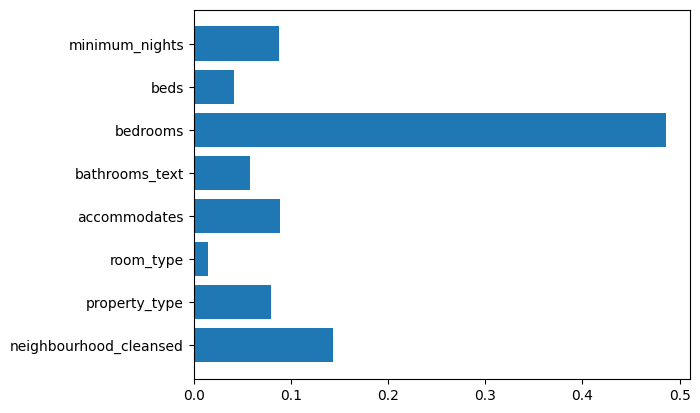

In [253]:
# Plotting feature importances

plt.barh(list(x_train.columns), rfr.feature_importances_)

## Conclusion for price prediction

*   In an effort to predict the price of a listing, the Random Forest Regressor provided the best result - 52% of the price can be explained by the model
*   The number of bedrooms is the most important feature to the model
*   Further studies might include feature engineering (including treating 'amenities' and adding more categorical features), using feature selection models and using PCA for dimension reduction



# Predicting occupancy rate above 50%


In [254]:
# Selecting a Dataframe for classification models

df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20291 entries, 0 to 22252
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  20291 non-null  int64  
 1   property_type           20291 non-null  int64  
 2   room_type               20291 non-null  int64  
 3   accommodates            20291 non-null  int64  
 4   bathrooms_text          20291 non-null  int64  
 5   bedrooms                20291 non-null  float64
 6   beds                    20291 non-null  float64
 7   price                   20291 non-null  float64
 8   minimum_nights          20291 non-null  int64  
 9   number_of_reviews_ltm   20291 non-null  int64  
 10  review_scores_rating    20291 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 2.4 MB


In [255]:
# Calculating the occupancy rate

df_analysis['occ_rate'] = round((df_analysis.minimum_nights * df_analysis.number_of_reviews_ltm) / 365, 2)

In [256]:
# Creating a binary feature to define occupancy above 50%

df_analysis['occ_rate_bin'] = df_analysis['occ_rate'].apply(lambda x: 1 if x > 0.50 else 0)

In [257]:
# Checking the balance

df_analysis.occ_rate_bin.value_counts()

0    20161
1      130
Name: occ_rate_bin, dtype: int64

The dataset is imbalanced

In [258]:
df_analysis = df_analysis.drop('occ_rate', axis=1)

In [259]:
# Defining the target

x = df_analysis.drop(['occ_rate_bin', 'minimum_nights', 'number_of_reviews_ltm', 'review_scores_rating'], axis=1)
y = df_analysis.occ_rate_bin

In [260]:
# Balancing the dataset with SMOTE

x_res, y_res = SMOTE(sampling_strategy='minority').fit_resample(x, y)

In [261]:
# Checking balance

pd.Series(y_res).value_counts(normalize=True)

0    0.5
1    0.5
Name: occ_rate_bin, dtype: float64

## Predicting occupancy rate (above = 1 or below 50% = 0) with a Decision Tree Classifier

In [262]:
# Splitting for hold out validation

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

In [263]:
# Training the model and predicting the price

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

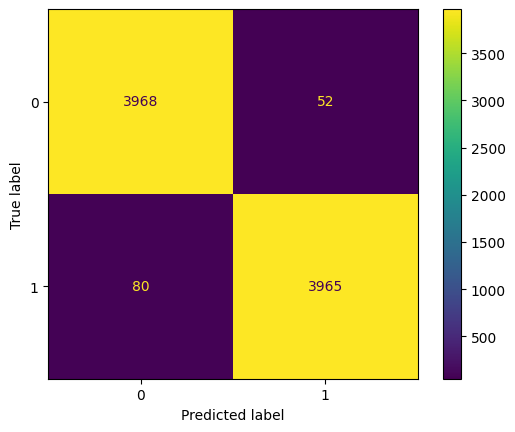

In [264]:
# Confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [265]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4020
           1       0.99      0.98      0.98      4045

    accuracy                           0.98      8065
   macro avg       0.98      0.98      0.98      8065
weighted avg       0.98      0.98      0.98      8065



([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'neighbourhood_cleansed'),
  Text(1, 0, 'property_type'),
  Text(2, 0, 'room_type'),
  Text(3, 0, 'accommodates'),
  Text(4, 0, 'bathrooms_text'),
  Text(5, 0, 'bedrooms'),
  Text(6, 0, 'beds'),
  Text(7, 0, 'price')])

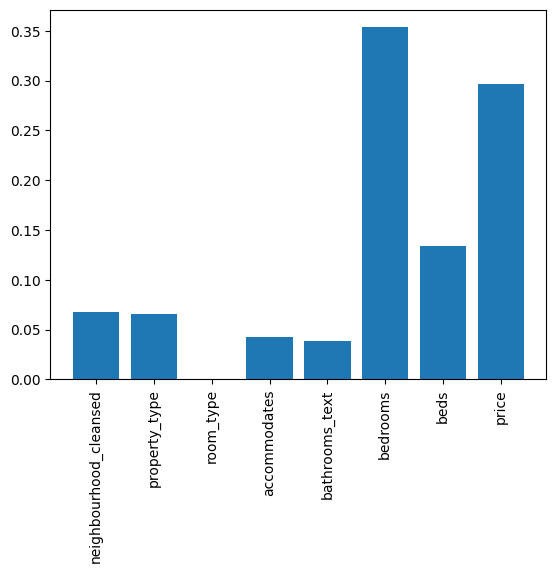

In [266]:
# Feature importances

plt.bar(x_train.columns, dt.feature_importances_)
plt.xticks(rotation='vertical')

## Conclusion for occupancy rate prediction



*   After balancing the dataset, the Decision Tree Classifier was able to predict with 98% accuracy wheter a listing will be occupied more than 50% of the year
*  Bedrooms and price are the most important features for the model



# Predicting a high rating (above 4)

In [267]:
# Choosing the dataset

df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18434 entries, 0 to 20290
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accommodates          18434 non-null  int64  
 1   bedrooms              18434 non-null  float64
 2   beds                  18434 non-null  float64
 3   price                 18434 non-null  float64
 4   minimum_nights        18434 non-null  int64  
 5   review_scores_rating  18434 non-null  float64
 6   x0_Entire home/apt    18434 non-null  float64
 7   x0_Hotel room         18434 non-null  float64
 8   x0_Private room       18434 non-null  float64
 9   x0_Shared room        18434 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.5 MB


In [298]:
# Creating the High Rating feature according to Review Scores Rating (above or below 4)

df_reg['high_rating'] = df_reg['review_scores_rating'].apply(lambda x: 1 if x > 4 else 0)

In [299]:
# Checking the balance

df_reg.high_rating.value_counts()

1    17081
0     1353
Name: high_rating, dtype: int64

The dataset is imbalanced

In [300]:
# Defining the target

x = df_reg.drop(['review_scores_rating', 'high_rating', 'minimum_nights'], axis=1)
y = df_reg.high_rating

In [301]:
# Balancing the dataset

x_res, y_res = SMOTE(sampling_strategy='minority').fit_resample(x, y)

In [302]:
# Checking balance

pd.Series(y_res).value_counts(normalize=True)

1    0.5
0    0.5
Name: high_rating, dtype: float64

In [303]:
num_fea = x_res.columns[:-4]
num_fea

Index(['accommodates', 'bedrooms', 'beds', 'price'], dtype='object')

In [304]:
# Splitting the data for hold out validation

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

In [305]:
# Pre Processing Numerical Features

for fea in num_fea:

  mms.fit(x_train[fea].values.reshape(-1,1))
  x_train[f'{fea}_scaled'] = mms.transform(x_train[fea].values.reshape(-1,1))
  x_test[f'{fea}_scaled'] = mms.transform(x_test[fea].values.reshape(-1,1))

In [306]:
x_train = x_train.drop(num_fea, axis=1)

In [307]:
x_test = x_test.drop(num_fea, axis=1)

# Predicting high rating review score with Logistic Regression

In [308]:
# Training the model and predicting the result

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

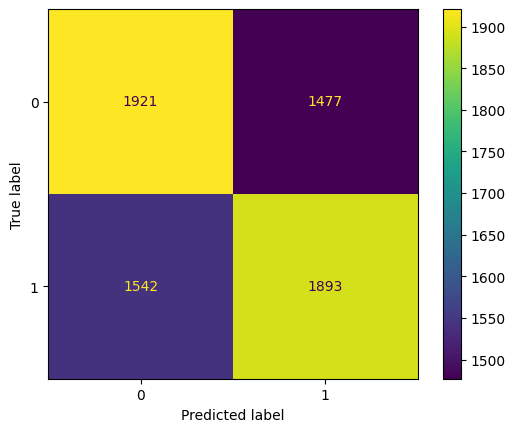

In [309]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [310]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.57      0.56      3398
           1       0.56      0.55      0.56      3435

    accuracy                           0.56      6833
   macro avg       0.56      0.56      0.56      6833
weighted avg       0.56      0.56      0.56      6833



## Conclusion for high rating prediction


*   A rating is considered high if it is above 4 (in a range of 0 - 5)
*   In order to predict whether or not the rating would be high, I used the Logistic Regression Model
*   After balancing the dataset, the model was able to predict high rating with 56% accuracy

